# Stock Market Analysis for Tech Stocks

In this project, we'll analyze data from the stock market for some technology stocks.
Here are the questions we'll try to answer:

What was the change in a stock's price over time?
What was the daily return average of a stock?
What was the moving average of various stocks?
What was the correlation between daily returns of different stocks?
How much value do we put at risk by investing in a particular stock?
How can we attempt to predict future stock behaviour?

# IMPORT LIBRARIES

In [4]:
# Python Data Analysis import
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

# DATA

In [5]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In [6]:
# Setting the end date today
end = datetime.now()

# Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

In [7]:
# Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start,end)
#The globals method sets the stock name to a global variable

Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked

In [8]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-03,125.709999,121.839996,124.809998,122.059998,112966300.0,121.338821
2021-03-04,123.599998,118.620003,121.750000,120.129997,178155000.0,119.420219
2021-03-05,121.940002,117.570000,120.980003,121.419998,153766600.0,120.702599
2021-03-08,121.000000,116.209999,120.930000,116.360001,154376600.0,115.672493
2021-03-09,122.059998,118.790001,119.029999,121.089996,129525800.0,120.374550


In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,148.552559,145.549999,146.977717,147.124410,8.855457e+07,146.693814
std,17.586166,16.935581,17.253443,17.279674,2.754062e+07,17.465544
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.672493
25%,133.785000,131.327503,132.137505,132.360001,6.904782e+07,131.745510
50%,148.019997,145.699997,146.544998,146.785004,8.373765e+07,146.240158
75%,162.827503,158.165001,160.012505,160.902504,1.032286e+08,160.697762
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-03 to 2022-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


### What's the change in stock's price over time?

<AxesSubplot:xlabel='Date'>

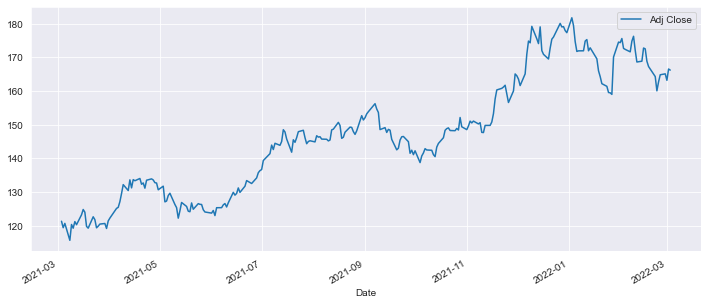

In [11]:
# Plot the stock adkusted closing price using pandas
AAPL['Adj Close'].plot(legend=True, figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

<AxesSubplot:xlabel='Date'>

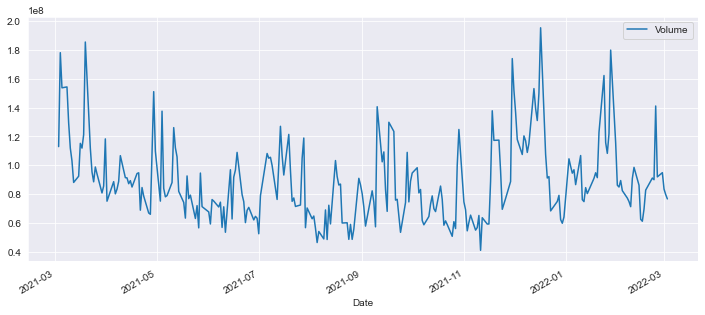

In [13]:
AAPL['Volume'].plot(legend=True, figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [22]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma, center=False).mean()

In [16]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA fot 10 days,MA fot 20 days,MA fot 50 days
Date,,,,,,,,,
2022-02-25,165.119995,160.869995,163.839996,164.850006,91974200.0,164.850006,167.102003,170.282748,171.266675
2022-02-28,165.419998,162.429993,163.059998,165.119995,94869100.0,165.119995,166.750003,170.033085,170.987638
2022-03-01,166.600006,161.970001,164.699997,163.199997,83474400.0,163.199997,166.182002,169.465205,170.810822
2022-03-02,167.360001,162.949997,164.389999,166.559998,79724800.0,166.559998,165.559003,169.073814,170.723577
2022-03-03,168.910004,165.550003,168.470001,166.229996,76678441.0,166.229996,164.927002,168.604501,170.657497


<AxesSubplot:xlabel='Date'>

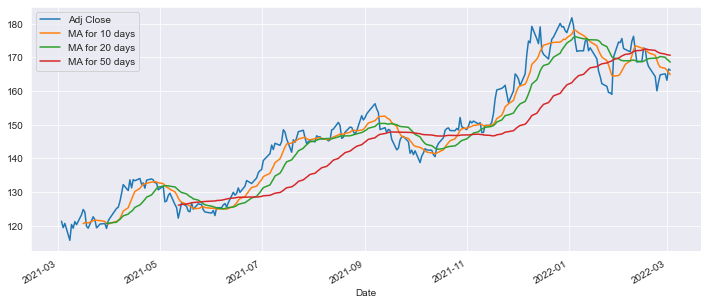

In [23]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

### What was the daily return average of a stock?

In [24]:
# The daily return column can be created by using the porcentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [25]:
AAPL['Daily Return'].tail()

Date
2022-02-25    0.012965
2022-02-28    0.001638
2022-03-01   -0.011628
2022-03-02    0.020588
2022-03-03   -0.001981
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

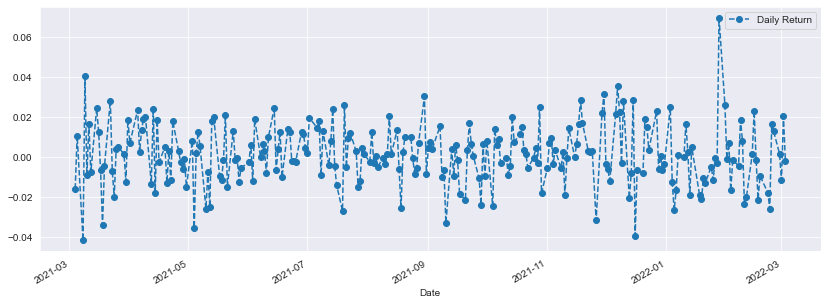

In [26]:
# Plotting the daily return 
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

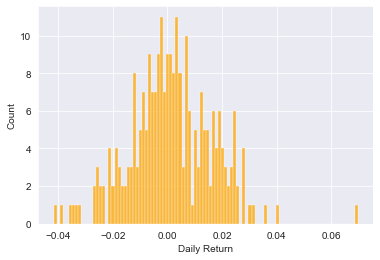

In [28]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='orange')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

### What was the correlation between daily returns of different stocks?

In [29]:
# Reading just  the 'Adj Close' column this time
close_df  = DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [30]:
close_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-02-25,164.850006,2689.189941,297.309998,3075.770020
2022-02-28,165.119995,2701.139893,298.790009,3071.260010
2022-03-01,163.199997,2681.229980,294.950012,3022.840088
2022-03-02,166.559998,2691.429932,300.190002,3041.050049
2022-03-03,166.229996,2677.989990,295.920013,2957.969971


Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [31]:
rets_df = close_df.pct_change()

In [32]:
rets_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-02-25,0.012965,0.013328,0.009233,0.016058
2022-02-28,0.001638,0.004444,0.004978,-0.001466
2022-03-01,-0.011628,-0.007371,-0.012852,-0.015765
2022-03-02,0.020588,0.003804,0.017766,0.006024
2022-03-03,-0.001981,-0.004994,-0.014224,-0.027320


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


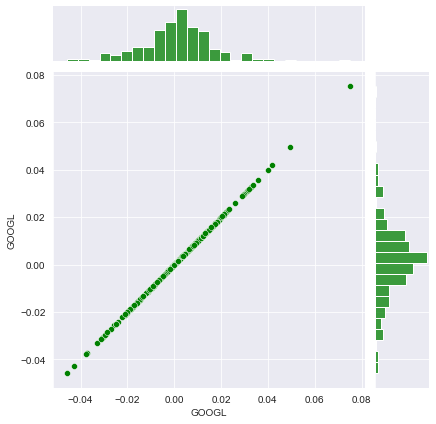

In [33]:
sns.jointplot('GOOGL','GOOGL',rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

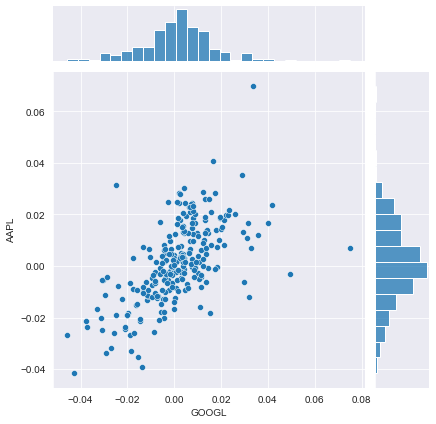

In [37]:
sns.jointplot('GOOGL','AAPL',rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

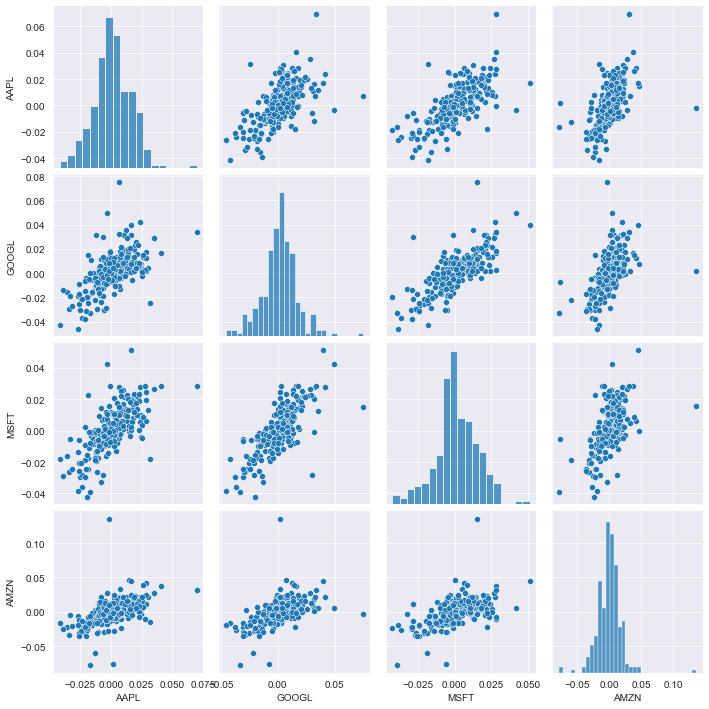

In [39]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

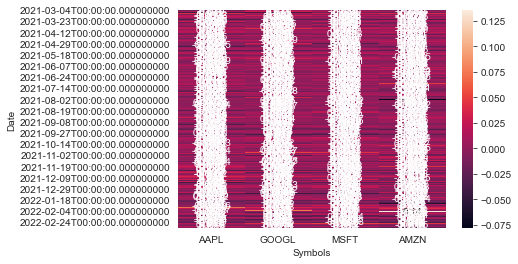

In [41]:
sns.heatmap(rets_df.dropna(),annot=True)

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [43]:
rets = rets_df.dropna()

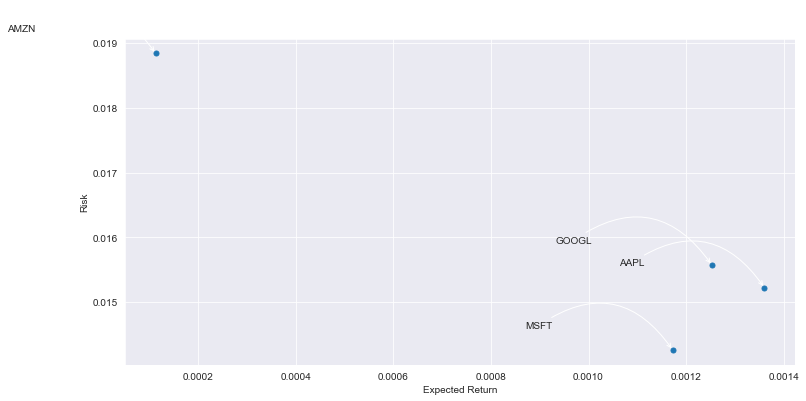

In [52]:
plt.figure(figsize=(12,6))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    

We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Amazon stocks have higher expected returns, but also have a higher risk

### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

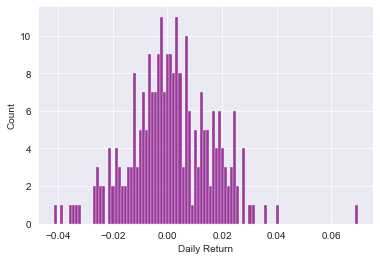

In [56]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [57]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2021-03-04,-0.015812,0.011196,-0.003647,-0.009128
2021-03-05,0.010738,0.031043,0.021479,0.007687
2021-03-08,-0.041673,-0.042712,-0.018178,-0.016168
2021-03-09,0.040650,0.016369,0.028101,0.037568
2021-03-10,-0.009167,-0.002044,-0.005817,-0.001701


In [58]:
# Using pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.024123079474992214

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

### How can we attempt to predict future stock behaviour?

__Monte Carlo Method__

In [59]:
days = 365

# delta t

dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [66]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        # Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        # New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [62]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-03,2075.989990,1994.000000,2051.949951,2011.410034,1694600,2011.410034
2021-03-04,2074.590088,2005.430054,2014.869995,2033.930054,2460800,2033.930054
2021-03-05,2106.199951,2027.780029,2061.149902,2097.070068,2655000,2097.070068
2021-03-08,2113.739990,2005.189941,2084.060059,2007.500000,1843400,2007.500000
2021-03-09,2063.919922,2035.599976,2049.750000,2040.359985,1696000,2040.359985


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

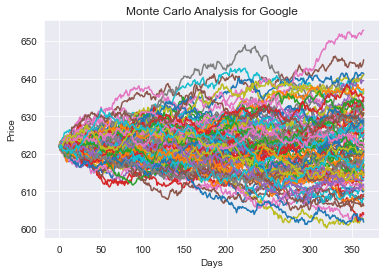

In [67]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [68]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

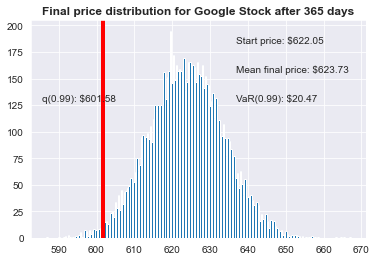

In [70]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD 622.05, and the average final price over 10,000 runs was USD 623.73.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD 18.38, 99% of the time.